In [1]:
import pandas as pd
import re
import chess
import numpy as np
import matplotlib.pyplot as plt

## Exploring The Data Format from [FICS](https://www.ficsgames.org/cgi-bin/download.cgi)

__NOTE:__ The extracted data from FICs is not included here due to sharing and usage concerns.

The data explored here was all of the game data from 2018. Although, only a small fraction of this huge dataset has been extracted and processed at this time. It takes a very long time to do.

In [2]:
# Do a head on the data to see the format
!head -n 30 2018 

The data appears to be a loosely structured test document where individual games are seperated by new lines, and the meta-data associated with the games is in brackets.

Additionally it looks like the games are seperated numerically and has the move made by White and Black in between each number, such as
` <turn number> <white move> <black move> <turn number> <white move>  <black move>`

Furthermore, it looks like the move notation is SAN. Pawn movements are listed by file. So White's first move of c4 means move the c2 pawn to position c4. 

The prefixes N, Q, R, B, and K refer to Knight, Queen, Rook, Bishop, and King respectively. 

In [3]:
## Code to convert the games to a python dictionary
def readFile(file_name):
    chess_list = []
    chess_game = {}
    with open(file_name) as f:
        for index, line in enumerate(f):
            
            line = line.strip()
            if len(line) == 0:
                continue
            if line[0] == '[':
                line = line.replace('[', '')
                line = line.replace(']', '')
                line = line.replace('"', '')
                
                key,value = line.split(' ', 1)
                chess_game[key] = value
            elif line[0] == '1':
                line = re.sub('\d*\.', ':', line).strip()
                chess_game['game'] = line.split(":")[1:]
                chess_list.append(chess_game)
                chess_game = {}
    return chess_list

chess_data = readFile('2018')
chess_data[0]

{'Event': 'FICS unrated standard game',
 'Site': 'FICS freechess.org',
 'FICSGamesDBGameNo': '450002740',
 'White': 'konozrout',
 'Black': 'khadem',
 'WhiteElo': '2301',
 'BlackElo': '2874',
 'WhiteRD': '49.7',
 'BlackRD': '46.8',
 'WhiteIsComp': 'Yes',
 'BlackIsComp': 'Yes',
 'TimeControl': '900+5',
 'Date': '2018.12.31',
 'Time': '23:23:00',
 'WhiteClock': '0:15:00.000',
 'BlackClock': '0:15:00.000',
 'ECO': 'D13',
 'PlyCount': '82',
 'Result': '0-1',
 'game': [' c4 Nf6 ',
  ' d4 c6 ',
  ' Nf3 d5 ',
  ' cxd5 cxd5 ',
  ' Nc3 a6 ',
  ' Bf4 Nc6 ',
  ' Rc1 Bf5 ',
  ' e3 Rc8 ',
  ' Be2 e6 ',
  ' O-O Nd7 ',
  ' Na4 h6 ',
  ' Bd3 Bxd3 ',
  ' Qxd3 Be7 ',
  ' Qb3 Na5 ',
  ' Qd1 O-O ',
  ' Rxc8 Qxc8 ',
  ' Qe1 Nc6 ',
  ' Qd2 b5 ',
  ' Nc3 Qb7 ',
  ' Ne2 Nb6 ',
  ' Rc1 Nc4 ',
  ' Qc2 Rc8 ',
  ' b3 Nb4 ',
  ' Qb1 Na3 ',
  ' Qa1 g5 ',
  ' Bg3 Nbc2 ',
  ' Qb2 f6 ',
  ' Nc3 Bb4 ',
  ' Ne2 Qh7 ',
  ' Rd1 Nxe3 ',
  ' Rc1 Nec2 ',
  ' Kh1 Kf7 ',
  ' Nfg1 h5 ',
  ' f4 h4 ',
  ' Bf2 gxf4 ',
  ' Nxf4 Qe4 

## Statistical Distribution Of The Data Set

### Ratio of White to Black Wins

In [4]:
# First look at the possible values for the results field
outcomes = set()
for game in chess_data:
    outcomes.add(game['Result'])
print(outcomes)

{'1/2-1/2', '1-0', '0-1'}


In [5]:
#For the classifications, lets not use the draw games as it can be unclear is there were good moves or not.
chess_data_cleaned = []
for game in chess_data:
    if len(game['Result']) == 3:
        chess_data_cleaned.append(game)
print(len(chess_data) - len(chess_data_cleaned))

11927


In [6]:
outcomes = set()
for game in chess_data_cleaned:
    outcomes.add(game['Result'])
print(outcomes) 

{'1-0', '0-1'}


In [7]:
white_wins = []
for game in chess_data:
    if game['Result'][0] == '0':
        white_wins.append(0)
    if game['Result'][0] == '1':
        white_wins.append(1)

In [8]:
white_wins = np.array(white_wins)
white_wins.mean()
white_wins_count = sum(white_wins == 1)
black_wins_count = sum(white_wins == 0)


In [9]:
print('white:', white_wins_count)
print('black:', black_wins_count)

white: 46846
black: 31474


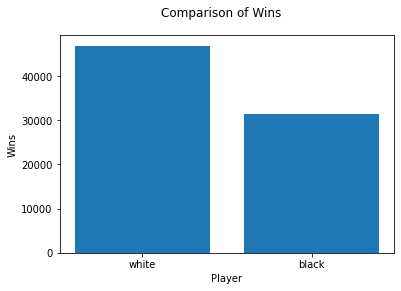

In [10]:
plt.bar(height =  [white_wins_count, black_wins_count], x = ['white', 'black'])
plt.xlabel('Player')
plt.ylabel('Wins')
plt.suptitle('Comparison of Wins')
plt.show()


### 5 Number Summary Of Game Lengths


In [12]:
## Look at the 5 number summary of the game lengths
import numpy as np
game_lengths = []
for game in chess_data_cleaned:
    game_lengths.append(len(game['game']))
print('number of games ', len(game_lengths))

number of games  66393


__Note__: The _'length'_ here is the number of turns. The number of moves is approximately twice this number since each player makes one move per turn

min 1
Q1 22.0
Median 32.0
Q3 45.0
max 292


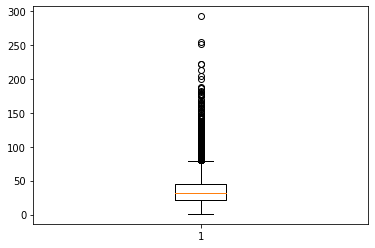

In [14]:
game_lengths = np.array(game_lengths)
print('min', game_lengths.min())
print('Q1', np.percentile(game_lengths, 25))
print('Median',np.percentile(game_lengths, 50))
print('Q3', np.percentile(game_lengths, 75))
print('max', game_lengths.max())
plt.boxplot(game_lengths)
plt.show()

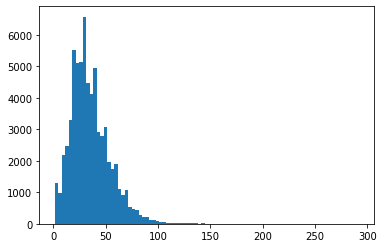

In [15]:
plt.hist(game_lengths, bins=int(len(set(game_lengths))/2))
plt.show()